In [201]:
import numpy as np
import matplotlib.pyplot as plt
import time as time

In [60]:
class Activity: #activity
    #constructor    
    def __init__(self, name='',x=0.0, y=0.0,s=0.0):
        
        #name
        self.name = name
        
        #position
        self.x_coord = x #x coordinate
        self.y_coord = y #y coordinate
        
        #score
        self.score = s

        
    def distance(self,b):
        return np.sqrt( np.square(self.x_coord-b.x_coord) + np.square(self.y_coord-b.y_coord))

In [211]:
class Journey:
    
    #constructor
    def __init__(self, idty=0, act=[]):
        self.idty=idty
        self.activities = act
        self.tour = range(len(act))
        self.tour_distance = 0.0
        self.score = 0.0
        self.nb_eval_dist=0
        
    def compute_score(self):
        return 0.0
    
    #remove one activity
    def remove(self, act):
        return
    
    #add one activity
    def insert(self, act):
        
        n=len(self.activities) #total number of activities currently in the journey
        
        if (n==0):
            self.tour.append(0)
            self.activities.append(act)
            return
        
        else:
        
            #activity act is inserted at the end of self.activities list
            #in the tour, we perform a least costly insertion
            
            #compute least costly insertion
            best_insertion = 1
            best_insertion_cost = np.inf
            for i in range(1,n+1):
                #compute improvement if (act) is inserted at position i
                insertion_cost = self.activities[self.tour[(i-1) %n]].distance(act) + self.activities[self.tour[i%n]].distance(act) - self.activities[self.tour[(i-1)%n]].distance(self.activities[(self.tour[i%n])]) 
                self.nb_eval_dist = self.nb_eval_dist+3
                
                if(insertion_cost < best_insertion_cost):
                    best_insertion = i
                    best_insertion_cost = insertion_cost
        
            #insert at best position
            self.tour.insert(best_insertion,n)
            #print 'Inserted', n, 'at position', best_insertion
            self.tour_distance = self.tour_distance+best_insertion_cost
            self.activities.append(act)
        
        return
    
    #replace activity1 by activity2
    def replace(self, act1, act2):
        
        self.remove(act1)
        self.insert(act2)
        n=len(self.activities)
        return
    
        #first, find act1's index and position in the tour
        act1_idx = 0
        act1_pos = 0
        for i in range(n):
            if self.activities[i]==act1:
                act1_idx = i
            if self.activities[tour[i]] ==act1:
                act1_pos = i
        
        print act1_idx, act1_pos
        
        #then, remove it from the tour
        tour_variation = - self.activities[self.tour[(act1_pos-1) %n]].distance(act1) - self.activities[self.tour[(act1_pos+1)%n]].distance(act1) + self.activities[self.tour[(act1_pos-1)%n]].distance(self.activities[(self.tour[(act1_pos+1)%n])]) 
        self.tour_distance = self.tour_distance + tour_improvement
        self.tour.remove(act1_pos)
        
        #replace act1 by act2 in the list of activities
        self.activities[act1_idx] = act2
        
        
        #compute least costly insertion
        best_insertion = 1
        best_insertion_cost = np.inf
        for i in range(1,n+1):
            #compute improvement if (act) is inserted at position i
            insertion_cost = self.activities[self.tour[(i-1) %n]].distance(act2) + self.activities[self.tour[i%n]].distance(act2) - self.activities[self.tour[(i-1)%n]].distance(self.activities[(self.tour[i%n])]) 
            self.nb_eval_dist = self.nb_eval_dist+3
              
            if(insertion_cost < best_insertion_cost):
                best_insertion = i
                best_insertion_cost = insertion_cost
        
        #insert at best position
        self.tour.insert(best_insertion,act1_idx)
        #print 'Inserted', n, 'at position', best_insertion
        self.tour_distance = self.tour_distance+best_insertion_cost
        return
        
    def two_opt(self):
        return
        

initial number of activities 0


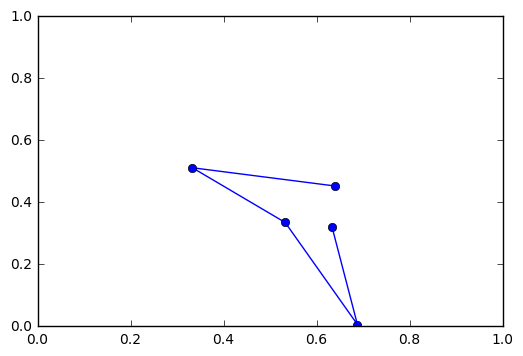

0.0
[0, 4, 3, 2, 1]
30


In [208]:
N=5
l=[None]*N

journey = Journey(0,[])

print 'initial number of activities', len(journey.activities)
x=[]
y=[]
start=time.time()

for i in range(N):
    a=Activity('',np.random.rand(), np.random.rand())
    x.append(a.x_coord)
    y.append(a.y_coord)
    l[i]=a
    journey.insert(a)
    
end=time.time()

for i in range(N):
    x[i]=journey.activities[journey.tour[i]].x_coord
    y[i]=journey.activities[journey.tour[i]].y_coord    
    
plt.plot(x,y,'o-')
plt.axis([0,1,0,1])
plt.show()

b=Activity('',np.random.rand(), np.random.rand())
journey.replace(a,b)

for i in range(N):
    x[i]=journey.activities[journey.tour[i]].x_coord
    y[i]=journey.activities[journey.tour[i]].y_coord    
    
plt.plot(x,y,'o-')
plt.axis([0,1,0,1])
plt.show()

print end-start
print journey.tour
print journey.nb_eval_dist
del journey

In [67]:
-1%1

0

In [ ]:
def journey_optimizer_master(activity_sets, #list of tuples (activity set, n_min, n_max)
                      dur_min=0.0,
                      dur_max=np.inf, #max journey duration
                      dist_min=0.0,
                      dist_max=np.inf, #max travel distance
                      t_solve_max=1.0, #maximum time allowed for solving
                      n_best=1
                        ): 

    n = activities.size() #number of activity types
    N_max_exhaustive = 10000 #max number of travels for exhaustive search
    n_tot = 1
    for k in range(n):
        n_tot = n_tot * len( activity_sets[k][0])
        if(n_tot > N_max_exhaustive):
            break
    
    if(n_tot <N_max_exhaustive): #maximum number of journeys is less than 10000
        #perform exhaustive search
        best_journeys = journey_optimizer_slave_exhaustive(activity_sets,n_tot,n_best)
        
    else:
        0.0
    
    return best_journeys

In [ ]:
def journey_optimizer_slave_exhaustive(activity_sets,n_tot,n_best): 

    n = activities.size() #number of activity types
    
    index=np.zeros(n)
    count = 0
    act=[None] * n #create empty set of activities
    for i in range(n):
        act[i]=(activity_sets[0][0][0])
    
    #create initial journey (will be modified iteratively)
    journey=Journey(act)
    current_score=0.0
    
    best_journeys=[None]*5
    
    while(count < n_tot):
        
        #compute current journey's score
        current_score = journey.score()
        
        
        count = count+1
        if(count >= n_tot):
            break
        else:
            #update indexes and journey
    
    return best_journeys

In [ ]:
act=[None] *10
for i in range(10):
    act[i]=True
    
act

In [ ]:
def tsp_distance(activities):
    
    n=len(activities)
    d=0.0
    
    #construct distance matrix
    dist=np.zeros((n,n))
    close_neighbours=np.zeros((n,n))
    
    for i in range(n):
        
        for j in range(i+1,n):
            #dist[i,j] = np.sqrt( np.square(activities[i].x_coord-activities[j].x_coord) + np.square(activities[i].y_coord-activities[j].y_coord))
            dist[i,j] = activities[i].distance[activities[j]]
            dist[j,i] = dist[i,j]
    for i in range(n):
        close_distance = np.inf #initialize closeest neighbours as being at distance of + Infty
        for j in range(n):
            if(i !=j ):
                if (dist[i,j] < close_distance):
                    close_neighbours[i]=j
                    close_distance = dist[i,j]
   
    #start with greedy insertion
    tour_idx=np.zeros(n)
    for i in range(n):
        tour_idx = close_neighbours[tour_idx[i]]
    
    #apply 2-opt post-optimization
    
    #compute tour
    tour=activities
    for i in range(n):
        tour[i] = activities[tour_idx[i]]
    return (d,tour)